# No Supervisado

In [1]:
!pip install mlxtend
!pip install xlrd
!pip install openpyxl

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore
from sklearn import metrics

In [3]:
df = pd.read_excel('/work/Data Modelos.xlsx')

# creando marca de éxito
#df['marca_exito'] = [1 if i > 3 else 0 for i in df['Porcentaje de clics de las impresiones (%)']]
df.columns

Index(['Suscriptores ganados', 'Tiempo de visualizaci√≥n (horas)', 'Me gusta',
       'Clics en teaser de tarjeta', 'Tarjetas mostradas',
       'Clics en elementos de pantalla final', 'suscriptores',
       'Densidad_Publicitaria', 'Porcentaje de clics de las impresiones (%)',
       'Duracion Minutos', 'Comentarios a√±adidos',
       'Porcentaje medio visto (%)', 'rating', 'dia_semana',
       'consecutivo_tema', 'No me gusta', 'RPM (USD)', 'marca_exito'],
      dtype='object')

In [4]:
scaler = StandardScaler()

X = np.array(df.drop(['marca_exito',  'id'], axis = 1))
# Standard Scaler to df
X = StandardScaler().fit_transform(X)

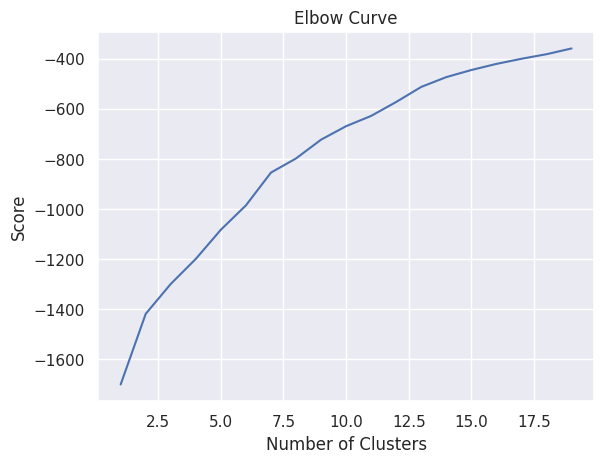

In [5]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [6]:
model = KMeans(n_clusters=2, random_state=42).fit(X)

In [7]:
# Agregar las etiquetas del cluster a los datos
df["cluster"] = model.labels_
df

,Suscriptores ganados,Tiempo de visualizaci√≥n (horas),Me gusta,Clics en teaser de tarjeta,Tarjetas mostradas,Clics en elementos de pantalla final,suscriptores,Densidad_Publicitaria,Porcentaje de clics de las impresiones (%),Duracion Minutos,Comentarios a√±adidos,Porcentaje medio visto (%),rating,dia_semana,consecutivo_tema,No me gusta,RPM (USD),marca_exito,cluster
0,0,0.0015,0,0,0,0,1,0.000,0.00,7.533333,0,1.31,4.901235,3,14,0,0.000,0,0
1,0,0.3858,0,0,0,0,5,0.312,8.13,12.800000,0,12.97,4.614458,1,5,1,0.769,1,0
2,0,22895.0000,1,0,0,1,35,0.228,3.14,35.066667,0,23.07,4.809524,1,4,0,3765.000,1,0
3,0,0.1308,0,0,0,0,15,0.234,1.45,12.833333,0,21.96,4.873303,1,16,0,0.000,0,0
4,0,0.1090,0,0,0,0,2,0.000,2.33,6.633333,0,28.11,4.777778,3,14,0,2667.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.5448,0,0,0,0,11,0.183,2.76,10.900000,0,46.93,4.900000,3,10,0,1429.000,0,0
96,0,11181.0000,2,0,0,0,13,0.300,6.79,10.000000,0,41.93,4.909091,3,13,0,1.000,1,0
97,0,40887.0000,0,0,3,0,32,0.228,4.97,17.566667,0,52.20,5.000000,3,10,0,1741.000,1,0
98,0,0.5051,0,0,0,0,5,0.238,1.55,21.033333,0,36.93,4.894737,3,10,0,0.000,0,0


In [8]:
# Ver los resultados
df.groupby('cluster').mean()

,Suscriptores ganados,Tiempo de visualizaci√≥n (horas),Me gusta,Clics en teaser de tarjeta,Tarjetas mostradas,Clics en elementos de pantalla final,suscriptores,Densidad_Publicitaria,Porcentaje de clics de las impresiones (%),Duracion Minutos,Comentarios a√±adidos,Porcentaje medio visto (%),rating,dia_semana,consecutivo_tema,No me gusta,RPM (USD),marca_exito
cluster,,,,,,,,,,,,,,,,,,
0,0.126316,9867.808344,0.389474,0.0,0.063158,0.073684,20.989474,0.186084,3.006632,14.786316,0.021053,31.711158,4.907542,1.726316,10.957895,0.010526,627.764884,0.421053
1,1.800000,98852.200000,3.400000,0.4,2.000000,3.000000,470.600000,0.126600,6.328000,14.433333,0.200000,42.844000,4.929195,1.400000,5.400000,0.000000,1144.343400,1.000000


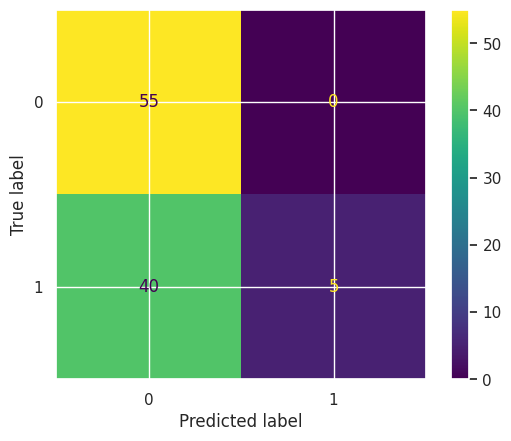

In [9]:
confusion_matrix = metrics.confusion_matrix(list(df['marca_exito']), list(df['cluster']))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])

cm_display.plot()
plt.show()

In [10]:
def calcular_precision_recall(matriz_confusion):
    # Extraer los valores de la matriz de confusión
    verdaderos_positivos = matriz_confusion[1, 1]
    falsos_positivos = matriz_confusion[0, 1]
    falsos_negativos = matriz_confusion[1, 0]
    verdaderos_negativos = matriz_confusion[0, 0]
    
    # Calcular la precisión y la exhaustividad
    precision = verdaderos_positivos / (verdaderos_positivos + falsos_positivos)
    recall = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)
    accuracy = (verdaderos_positivos + verdaderos_negativos) / np.sum(matriz_confusion)

    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return precision, recall, accuracy, f1_score

# Calcular precisión, recall y accuracy
precision, recall, accuracy, f1_score = calcular_precision_recall(confusion_matrix)

# Imprimir los resultados
print("Precisión:", precision)
print("Exhaustividad:", recall)
print("Exactitud:", accuracy)
print("F1-score:", f1_score)

Precisión: 1.0
Exhaustividad: 0.1111111111111111
Exactitud: 0.6
F1-score: 0.19999999999999998


In [11]:
centers = model.cluster_centers_
centers

array([[-1.51305176e-01, -1.34800241e-01, -1.56222961e-01,
        -1.42857143e-01, -1.37728872e-01, -1.27758702e-01,
        -1.06711113e-01,  2.94686121e-02, -8.61221494e-02,
         2.28737071e-03, -5.24504026e-02, -3.10444327e-02,
        -7.51936956e-03,  1.58033756e-02,  5.58053063e-02,
         5.28967271e-03, -1.64980424e-02],
       [ 2.87479834e+00,  2.56120459e+00,  2.96823627e+00,
         2.71428571e+00,  2.61684857e+00,  2.42741534e+00,
         2.02751115e+00, -5.59903631e-01,  1.63632084e+00,
        -4.34600435e-02,  9.96557649e-01,  5.89844220e-01,
         1.42868022e-01, -3.00264136e-01, -1.06030082e+00,
        -1.00503782e-01,  3.13462806e-01]])

In [12]:
y = model.labels_
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [13]:
X

array([[-0.37969035, -0.43377014, -0.56043622, ...,  0.6667043 ,
        -0.10050378, -0.41747839],
       [-0.37969035, -0.4337585 , -0.56043622, ..., -1.14062664,
         9.94987437, -0.4169872 ],
       [-0.37969035,  0.25989113,  0.47740863, ..., -1.34144119,
        -0.10050378,  1.98738855],
       ...,
       [-0.37969035,  0.80500379, -0.56043622, ..., -0.13655389,
        -0.10050378,  0.69457296],
       [-0.37969035, -0.43375489, -0.56043622, ..., -0.13655389,
        -0.10050378, -0.41747839],
       [-0.37969035, -0.43375311,  0.47740863, ...,  1.0683334 ,
        -0.10050378, -0.41726569]])

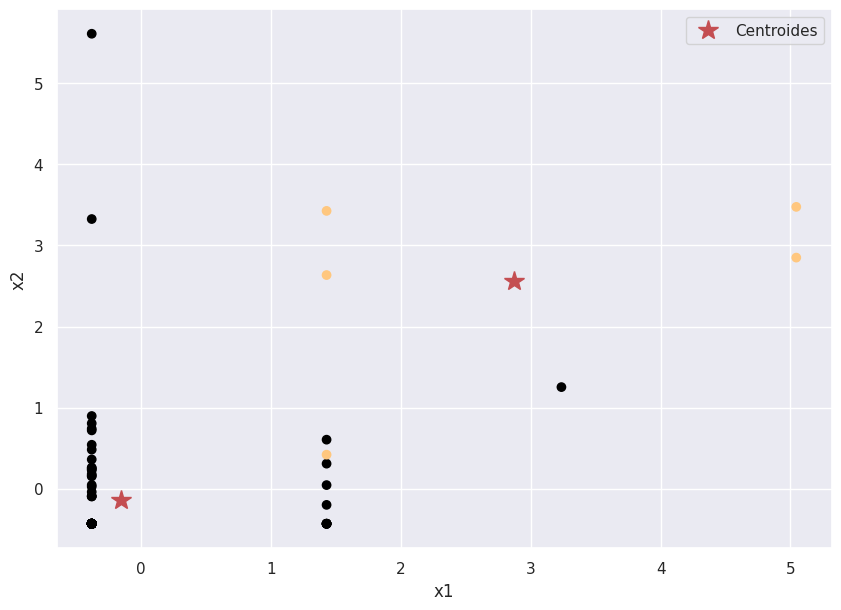

In [14]:
plt.figure(figsize=(10,7))
plt.plot(centers[:,0], centers[:,1], "r*", markersize=15, label="Centroides")
plt.scatter(X[:,0], X[:,1], c=y, cmap="copper")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend();

# Métricas:

In [15]:
silhouette = silhouette_score(X, model.labels_)
davies_bouldin = davies_bouldin_score(X, model.labels_)

print(f"Silhouette score: {silhouette}")
print(f"Davies-Bouldin score: {davies_bouldin}")

Silhouette score: 0.5767454746656121
Davies-Bouldin score: 1.4178539451312466


El Silhouette score y el Davies-Bouldin score son métricas de validación para evaluar la calidad de la agrupación en un modelo de clustering Kmeans.

El Silhouette score mide la similitud de cada punto con su propio cluster en comparación con otros clusters. El valor del Silhouette score varía entre -1 y 1, donde un valor más cercano a 1 indica que los puntos están bien agrupados y separados entre sí. En este caso, el valor de 0.57 indica una buena separación de los clusters.

El Davies-Bouldin score mide la relación media entre la distancia intra-cluster y la distancia inter-cluster. Un valor más cercano a cero indica una mejor separación entre los clusters. En este caso, el valor de 1.41 sugiere que los clusters están relativamente bien separados, pero no hay una separación clara y distintiva.

In [16]:
## distancia intracluster

distances = pairwise_distances(X, metric='mahalanobis')

# Diccionario para almacenar las distancias intracluster
intra_cluster_distances = {}

# Itera sobre cada cluster y calcula la distancia intracluster
for i in range(2):
    cluster_indices = np.where(model.labels_ == i)[0]
    cluster_distances = distances[cluster_indices][:, cluster_indices]
    intra_cluster_distances[i] = np.mean(cluster_distances)

intra_cluster_distances

{0: 4.879628971873794, 1: 9.484701934198831}

Los clusters 0 y 1 tienen valores de distancia intracluster, lo que sugiere que los puntos dentro de cada cluster son relativamente homogéneos.

In [17]:
9.484 - 4.87

4.614

In [18]:
## distancia intercluster

distances = pairwise_distances(X, metric='mahalanobis')

# Calcula la distancia intercluster media
inter_cluster_distance = np.mean([np.min(distances[np.where(model.labels_ == i)][:, np.where(model.labels_ != i)[0]]) for i in range(2)])
inter_cluster_distance


6.981381929457969

El resultado de 6.981381929457969 muestra una separación moderada entre los clusters en el modelo Kmeans. En general, una distancia intercluster de este tamaño puede sugerir que los clusters tienen cierta similitud entre sí, pero aún así hay una separación suficiente para justificar la segmentación en clusters separados.

# Kmeans No paramétrico

In [19]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#from scipy.spatial.distance import mahalanobis
from scipy.spatial.distance import cdist
import numpy as np

In [20]:
df = pd.read_excel('/work/Data Modelos.xlsx')

# creando marca de éxito
#df['marca_exito'] = [1 if i > 3 else 0 for i in df['Porcentaje de clics de las impresiones (%)']]
df.columns

Index(['Suscriptores ganados', 'Tiempo de visualizaci√≥n (horas)', 'Me gusta',
       'Clics en teaser de tarjeta', 'Tarjetas mostradas',
       'Clics en elementos de pantalla final', 'suscriptores',
       'Densidad_Publicitaria', 'Porcentaje de clics de las impresiones (%)',
       'Duracion Minutos', 'Comentarios a√±adidos',
       'Porcentaje medio visto (%)', 'rating', 'dia_semana',
       'consecutivo_tema', 'No me gusta', 'RPM (USD)', 'marca_exito'],
      dtype='object')

In [21]:
scaler = StandardScaler()

X = np.array(df.drop('marca_exito', axis = 1))
# Standard Scaler to df
X = StandardScaler().fit_transform(X)

In [22]:
# Definir la función de distancia de Mahalanobis
def mahalanobis_distance(X, Y):
    inv_covariance = np.linalg.inv(covariance_matrix)
    distances = []
    for i in range(len(X)):
        distance = mahalanobis(X[i], Y[i], inv_covariance)
        distances.append(distance)
    return distances

In [23]:
# Definir una función de distancia personalizada (distancia de Mahalanobis)
def mahalanobis_distance(X, Y, inv_covariance_matrix):
    pairwise_distances = cdist(X, Y, 'mahalanobis', VI=inv_covariance_matrix)
    return pairwise_distances

In [24]:
# Sobrescribir el método fit para usar la distancia de Mahalanobis
def custom_fit(self, X, inv_covariance_matrix):
    self.X = X
    self.cluster_centers_ = np.random.randn(self.n_clusters, X.shape[1])
    self.distances = mahalanobis_distance(X, self.cluster_centers_, inv_covariance_matrix)
    self.labels_ = np.argmin(self.distances, axis=1)
    return self

In [25]:
# Definir la función de K Means de forma general para la iteracion de hiperparametros

def kMeansIterator (X, K):

    # Calcular la matriz de covarianza de los datos de entrada
    covariance_matrix = np.cov(X, rowvar=False)
    inv_covariance_matrix = np.linalg.pinv(covariance_matrix)

    kmeans = KMeans(n_clusters=K)

    # Asignar el método personalizado a la instancia de KMeans
    kmeans.fit = custom_fit.__get__(kmeans)

    # Ajustar el modelo a los datos de entrada
    kmeans.fit(X, inv_covariance_matrix)

    # Obtener las etiquetas de los clusters asignados a cada muestra
    labels = kmeans.labels_

    # Calcular los centroides manualmente
    centroids = []
    for i in range(kmeans.n_clusters):
        centroid = np.mean(X[labels == i], axis=0)
        centroids.append(centroid)

    centers = np.array(centroids)

    # Imprimir los resultados
    # print("Etiquetas de los clusters:")
    # print(labels)
    # print(X)
    # print("Coordenadas de los centroides:")
    # print(centers)

    # plt.figure(figsize=(10,7))
    # plt.plot(centers[:,0], centers[:,1], "r*", markersize=15, label="Centroides")
    # plt.scatter(X[:,0], X[:,1], c=labels, cmap="copper")
    # plt.xlabel("x1")
    # plt.ylabel("x2")
    # plt.legend()

    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)

    print(f"Silhouette score: {silhouette}")
    print(f"Davies-Bouldin score: {davies_bouldin}")

    ## distancia intracluster

    distances = pairwise_distances(X, metric='mahalanobis')

    # Diccionario para almacenar las distancias intracluster
    intra_cluster_distances = {}

    # Itera sobre cada cluster y calcula la distancia intracluster
    for i in range(K):
        cluster_indices = np.where(labels == i)[0]
        cluster_distances = distances[cluster_indices][:, cluster_indices]
        intra_cluster_distances[i] = np.mean(cluster_distances)

    print(f"Intra Cluster score: {np.mean(list(intra_cluster_distances.values()))}","\n")
    print(intra_cluster_distances)
    


    print("-"*50)


In [26]:
# Iteracion de hiperparametros
for K in range(2, 5, 1):
    print(f'current Iteration K={K}')
    kMeansIterator(X, K)

current Iteration K=2
Silhouette score: 0.09506714058350749
Davies-Bouldin score: 4.997676048288332
Intra Cluster score: 5.464155466483957 

{0: 6.089285022118574, 1: 4.839025910849339}
--------------------------------------------------
current Iteration K=3
Silhouette score: 0.1421246242013108
Davies-Bouldin score: 3.2911027979862157
Intra Cluster score: 5.859920052949145 

{0: 4.617218857584468, 1: 5.857216610191249, 2: 7.105324691071719}
--------------------------------------------------
current Iteration K=4
Silhouette score: -0.06946642082245601
Davies-Bouldin score: 3.3788658023383156
Intra Cluster score: 3.8724119483282493 

{0: 5.95640838819453, 1: 0.0, 2: 5.105480038030097, 3: 4.427759367088371}
--------------------------------------------------


In [27]:
### Se calcula el modelo con K seleccionado que es 2 (basado en distancia intracluster...)
# Calcular la matriz de covarianza de los datos de entrada
covariance_matrix = np.cov(X, rowvar=False)
inv_covariance_matrix = np.linalg.pinv(covariance_matrix)

kmeans = KMeans(n_clusters=2)

# Asignar el método personalizado a la instancia de KMeans
kmeans.fit = custom_fit.__get__(kmeans)

# Ajustar el modelo a los datos de entrada
kmeans.fit(X, inv_covariance_matrix)

# Obtener las etiquetas de los clusters asignados a cada muestra
labels = kmeans.labels_

# Agregar las etiquetas del cluster a los datos
df["cluster"] = kmeans.labels_
df

,Suscriptores ganados,Tiempo de visualizaci√≥n (horas),Me gusta,Clics en teaser de tarjeta,Tarjetas mostradas,Clics en elementos de pantalla final,suscriptores,Densidad_Publicitaria,Porcentaje de clics de las impresiones (%),Duracion Minutos,Comentarios a√±adidos,Porcentaje medio visto (%),rating,dia_semana,consecutivo_tema,No me gusta,RPM (USD),marca_exito,cluster
0,0,0.0015,0,0,0,0,1,0.000,0.00,7.533333,0,1.31,4.901235,3,14,0,0.000,0,0
1,0,0.3858,0,0,0,0,5,0.312,8.13,12.800000,0,12.97,4.614458,1,5,1,0.769,1,0
2,0,22895.0000,1,0,0,1,35,0.228,3.14,35.066667,0,23.07,4.809524,1,4,0,3765.000,1,0
3,0,0.1308,0,0,0,0,15,0.234,1.45,12.833333,0,21.96,4.873303,1,16,0,0.000,0,0
4,0,0.1090,0,0,0,0,2,0.000,2.33,6.633333,0,28.11,4.777778,3,14,0,2667.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.5448,0,0,0,0,11,0.183,2.76,10.900000,0,46.93,4.900000,3,10,0,1429.000,0,0
96,0,11181.0000,2,0,0,0,13,0.300,6.79,10.000000,0,41.93,4.909091,3,13,0,1.000,1,0
97,0,40887.0000,0,0,3,0,32,0.228,4.97,17.566667,0,52.20,5.000000,3,10,0,1741.000,1,0
98,0,0.5051,0,0,0,0,5,0.238,1.55,21.033333,0,36.93,4.894737,3,10,0,0.000,0,0


In [28]:
# Ver los resultados
df.groupby('cluster').mean()

,Suscriptores ganados,Tiempo de visualizaci√≥n (horas),Me gusta,Clics en teaser de tarjeta,Tarjetas mostradas,Clics en elementos de pantalla final,suscriptores,Densidad_Publicitaria,Porcentaje de clics de las impresiones (%),Duracion Minutos,Comentarios a√±adidos,Porcentaje medio visto (%),rating,dia_semana,consecutivo_tema,No me gusta,RPM (USD),marca_exito
cluster,,,,,,,,,,,,,,,,,,
0,0.142857,12486.61686,0.527473,0.021978,0.175824,0.241758,45.736264,0.184011,3.108352,14.682784,0.032967,31.989121,4.902633,1.747253,10.868132,0.010989,683.636429,0.428571
1,0.888889,32824.51760,0.666667,0.000000,0.000000,0.000000,20.555556,0.174000,3.823333,15.637037,0.000000,35.085556,4.969210,1.333333,8.777778,0.000000,349.829556,0.666667


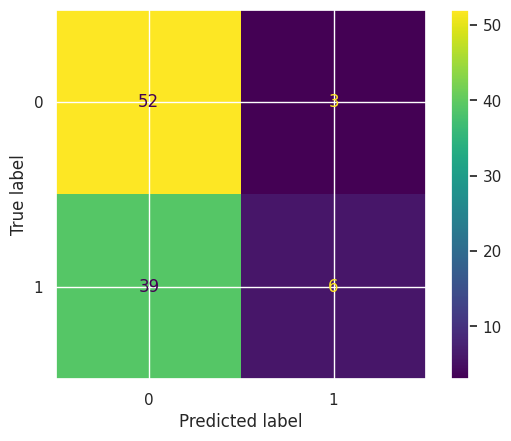

In [29]:
tragetClass = list(df['marca_exito'])
predictedClass = list(df['cluster'])

confusion_matrix = metrics.confusion_matrix(tragetClass, predictedClass)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["0", "1"])

cm_display.plot()
plt.show()

In [30]:
def calcular_precision_recall(matriz_confusion):
    # Extraer los valores de la matriz de confusión
    verdaderos_positivos = matriz_confusion[1, 1]
    falsos_positivos = matriz_confusion[0, 1]
    falsos_negativos = matriz_confusion[1, 0]
    verdaderos_negativos = matriz_confusion[0, 0]
    
    # Calcular la precisión y la exhaustividad
    precision = verdaderos_positivos / (verdaderos_positivos + falsos_positivos)
    recall = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)
    accuracy = (verdaderos_positivos + verdaderos_negativos) / np.sum(matriz_confusion)

    f1_score = 2 * (precision * recall) / (precision + recall)
    
    return precision, recall, accuracy, f1_score

# Calcular precisión, recall y accuracy
precision, recall, accuracy, f1_score = calcular_precision_recall(confusion_matrix)

# Imprimir los resultados
print("Precisión:", precision)
print("Exhaustividad:", recall)
print("Exactitud:", accuracy)
print("F1-score:", f1_score)


Precisión: 0.6666666666666666
Exhaustividad: 0.13333333333333333
Exactitud: 0.58
F1-score: 0.2222222222222222


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=af42914d-1d55-41f0-8851-adb5c602e38b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>